<a href="https://colab.research.google.com/github/felipesayegg/CarPriceEstimator/blob/main/MultilayerPerceptronCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução - Previsão de Preços de Veículos com MLP

## 📌 Desvendando o Potencial das Redes Neurais no Mercado Automotivo

Prever com precisão o preço de veículos continua a ser um desafio essencial no mercado automotivo. Neste projeto, abordamos essa tarefa utilizando modelos avançados de redes neurais, especificamente o **Perceptron Multicamadas (MLP)**. As redes neurais são conhecidas por capturar relações complexas e padrões nos dados, o que pode levar a previsões mais precisas e robustas.

## 🎯 Abordagem de Aprendizado de Máquina

Esta iniciativa tem como foco a **previsão dos preços de veículos** utilizando um conjunto diversificado de características dos automóveis. Enviado formação rica e variada, empregaremos técnicas de redes neurais para modelagem de relacionamento entre variáveis em um contexto de regressão.

## 💡 Solução Proposta com MLP

Para enfrentar esse desafio, implementaremos o **MLP Regressor**, uma estrutura de rede neural que se destaca na modelagem de dados complexos. Espera-se que essa abordagem melhore as previsões ao detectar padrões sutis nos dados que algoritmos mais simples podem não capturar.

## 🎯 Objetivos do Projeto

- Desenvolver um modelo preditivo eficiente para **estimar preços dos veículos** com base em suas características.
- Entender as **interações entre variáveis** para identificar fatores que mais impactam o valor do carro.
- Fornecer **insights valiosos** para consumidores, vendedores e analistas do setor automotivo.

🚀 **Vamos explorar o poder das redes neurais no mercado de veículos!**

# 2. -  Importar Bibliotecas do projeto e Coleta de dados.

In [21]:
# Importação das bibliotecas necessárias para o projeto

import pandas as pd                  # Importando a biblioteca Pandas, utilizada para manipulação e análise de dados em formato de tabela (DataFrame)
import numpy as np                   # Importando a biblioteca NumPy, que nos ajuda a trabalhar com matrizes e cálculos numéricos de forma eficiente
import matplotlib.pyplot as plt      # Importando a biblioteca Matplotlib, usada para criar gráficos e visualizações intuitivas
import seaborn as sns                # Importando a biblioteca Seaborn, que torna os gráficos do Matplotlib mais bonitos e fáceis de interpretar

from sklearn.model_selection import train_test_split  # Utilizado para dividir os dados em conjuntos de treino e teste de forma automatizada
from sklearn.preprocessing import StandardScaler      # Ferramenta para normalizar (padronizar) variáveis numéricas, garantindo consistência nos dados
from sklearn.preprocessing import OneHotEncoder       # Técnica para transformar variáveis categóricas em formato numérico (codificação one-hot)
from sklearn.neural_network import MLPRegressor       # Modelo de Perceptron Multicamadas para regressão linear usado neste projeto
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Métricas para avaliar o desempenho das previsões feitas pelo modelo

from datetime import datetime        # Módulo para trabalhar com datas e calcular a idade dos veículos com base no ano de registro

In [22]:
# Carregando os dados em um DataFrame do Pandas
dados = pd.read_csv('/content/autos.csv', encoding='ISO-8859-1')  # O arquivo autos.csv contém informações sobre os veículos
# - O parâmetro encoding='ISO-8859-1' garante a leitura correta de caracteres especiais
# - Adjuste o caminho '/content/autos.csv' se seu arquivo estiver em outro local

dados.head()  # Exibindo as primeiras 5 linhas do dataset para conferir sua estrutura e os tipos de dados disponíveis

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### 2.1 - Inspeção Inicial do Dataset

In [23]:
dados.info() # Tipos de dados e se a dados ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [24]:
 dados.isnull().sum() # somar quantas linhas nulas tem no dataframe

,0
dateCrawled,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,37869
yearOfRegistration,0
gearbox,20209
powerPS,0


### 2.2 - Exclusão e Ajustes de Variáveis.

In [25]:
# Removendo colunas desnecessárias
colunas_para_remover = [
    'dateCrawled', 'name', 'seller', 'offerType', 'dateCreated',
    'nrOfPictures', 'postalCode', 'lastSeen', 'monthOfRegistration','abtes'
]  # Estas colunas foram identificadas como irrelevantes para a previsão de preços


In [26]:
# Excluindo as colunas listadas acima
dados.drop(columns=colunas_para_remover, inplace=True, errors='ignore')  # Removendo as colunas diretamente do DataFrame

Decidimos, antes de prosseguir com o projeto, realizar a exclusão de variáveis que, após uma análise inicial do contexto de negócio, não consideramos relevantes para o aprendizado do modelo.
Essas variáveis foram identificadas como desnecessárias por não apresentarem relação direta com o objetivo principal do projeto, que é a previsão de preços dos veículos. Por exemplo:

dateCrawled e dateCreated: Informações relacionadas ao momento de coleta dos dados, sem impacto direto no preço do veículo.

seller e offerType: Variáveis com valores redundantes ou que não trazem variabilidade suficiente para agregar ao aprendizado.

nrOfPictures: Coluna que não apresenta informações úteis no contexto do problema.

Essa etapa é importante para reduzir o ruído nos dados, simplificar o dataset e focar nas variáveis que realmente contribuem para a construção de um modelo preditivo mais eficiente.

In [27]:
ano_atual = datetime.now().year  # Obtendo o ano atual para calcular a idade dos veículos

In [28]:
dados['ageOfVehicle'] = ano_atual - dados['yearOfRegistration']  # Criando uma nova coluna 'ageOfVehicle' com a idade dos veículos

In [29]:
# Removendo variáveis irrelevantes
dados = dados.drop(['yearOfRegistration'], axis=1)

Ao transformar o ano de registro do carro na sua respectiva idade, o modelo passa a trabalhar com uma métrica mais direta e interpretável.

Essa transformação é importante porque:

Escala mais apropriada: Ao invés de utilizar um valor de ano que pode variar consideravelmente (por exemplo, 1990 a 2022), a idade do carro resulta em uma escala menor e mais homogênea, facilitando o processamento pelo modelo.
Relevância para o problema: A idade do veículo é um indicador direto de desgaste e depreciação, atributos essenciais para a previsão do preço.

Interpretação intuitiva: Valores como "10 anos de idade" oferecem uma compreensão imediata da condição do veículo, o que não ocorre com o ano exato de registro.

Resumo:
Converter o ano de registro em idade do carro torna a informação mais útil para o modelo de rede neural, permitindo uma melhor associação entre os dados e os padrões de depreciação que influenciam o preço dos veículos.

In [30]:
dados.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,ageOfVehicle
0,480,test,NaN,manuell,0,golf,150000,benzin,volkswagen,NaN,32
1,18300,test,coupe,manuell,190,NaN,125000,diesel,audi,ja,14
2,9800,test,suv,automatik,163,grand,125000,diesel,jeep,NaN,21
3,1500,test,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,24
4,3600,test,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,17


este modelo de previsão de preço de veículos, mantivemos as seguintes variáveis, cada uma selecionada por sua contribuição significativa para prever o preço final do veículo:

- **price**: Variável alvo. Preço que estamos tentando prever.
- **vehicleType**: O tipo do veículo (SUV, sedan, etc.) afeta diretamente o valor de mercado.
- **gearbox**: Tipo de câmbio (manual ou automático), que influenciam o preço devido a preferências regionais/culturais.
- **powerPS**: Potência do motor; motores mais potentes costumam ter preços mais elevados.
- **model**: O modelo pode variar bastante em preço dentro da mesma marca devido a características específicas.
- **kilometer**: Quilometragem rodada; menor quilometragem usualmente implica em maior valor.
- **fuelType**: Tipo de combustível (gasolina, diesel, etc.), que pode afetar o preço devido a custos operacionais.
- **brand**: Marca do veículo; marcas com maior prestígio frequentemente têm valores mais elevados.
- **notRepairedDamage**: Indica danos não reparados, podendo diminuir significativamente o valor de um veículo.
- **ageOfVehicle**:  Representa a idade do veículo, calculada a partir da diferença entre o ano atual e o ano de registro. Essa variável é crucial porque sintetiza de forma direta o desgaste e a depreciação do veículo, oferecendo uma escala mais adequada para o modelo. Ao converter o ano de registro em idade, garantimos que a métrica seja mais intuitiva e leve para o processamento, ajudando a capturar de maneira efetiva como a passagem do tempo impacta o valor do veículo.
Essas variáveis foram escolhidas por sua relevância demonstrada na literatura e prática de modelagem preditiva de preços, capturando fatores críticos que influenciam a avaliação dos preços de veículos.

# 3 -Análise Exploratória de Dados (EDA)

In [31]:
# Exibindo as estatísticas básicas do dataset para entender a distribuição numérica das variáveis,
# como média, desvio padrão, valores mínimos, máximos e quantis.
print("Estatísticas Descritivas:")
print(dados.describe())

Estatísticas Descritivas:
              price        powerPS      kilometer   ageOfVehicle
count  3.715280e+05  371528.000000  371528.000000  371528.000000
mean   1.729514e+04     115.549477  125618.688228      20.422003
std    3.587954e+06     192.139578   40112.337051      92.866598
min    0.000000e+00       0.000000    5000.000000   -7974.000000
25%    1.150000e+03      70.000000  125000.000000      17.000000
50%    2.950000e+03     105.000000  150000.000000      22.000000
75%    7.200000e+03     150.000000  150000.000000      26.000000
max    2.147484e+09   20000.000000  150000.000000    1025.000000


1. Variável price (Preço do veículo)
Média: R$ 1.729,51 (aproximadamente).
Desvio Padrão: R$ 3.587.954,68, indicando uma alta variabilidade nos preços.
Mínimo: R$ 0, o que pode indicar veículos com valores inválidos ou registros promocionais.
Máximo: R$ 2.147.483.647, um valor extremamente alto que parece ser um outlier.
Percentis (25%, 50%, 75%): A maioria dos veículos está na faixa de R$ 1.150 a R$ 7.200.
Conclusão:
Os valores extremos (mínimo e máximo) sugerem a presença de outliers e possíveis inconsistências. Será necessário tratá-los antes de prosseguir com a modelagem.

2. Variável powerPS (Potência do motor em cavalos)
Média: 115,55 cv.
Desvio Padrão: 139,20 cv, indicando uma grande variação na potência dos veículos.
Mínimo: 0 cv, o que pode indicar valores ausentes ou errados.
Máximo: 20.000 cv, um valor irreal para um veículo, sugerindo um outlier.
Percentis (25%, 50%, 75%): A maioria dos veículos está na faixa de 75 a 150 cv.
Conclusão:
Há registros com valores de potência inválidos (0 e 20.000), que precisam ser investigados e tratados. A maior parte dos veículos tem potência moderada, condizente com a média.

3. Variável kilometer (Quilometragem rodada)
Média: 125.161 km.
Desvio Padrão: 40.112 km, indicando uma variação significativa na quilometragem.
Mínimo: 5.000 km, sugerindo veículos relativamente novos ou pouco usados.
Máximo: 150.000 km, que parece ser o limite superior definido no dataset.
Percentis (25%, 50%, 75%): Grande parte dos veículos está na faixa de 125.000 a 150.000 km, indicando que muitos são usados.
Conclusão:
A quilometragem apresenta uma distribuição consistente, com valores dentro de um intervalo esperado para veículos usados. Não há evidências de valores inválidos.

4. Variável ageOfVehicle (Idade do veículo em anos)
Média: 20,42 anos.
Desvio Padrão: 92,87 anos, o que indica uma alta variabilidade, possivelmente causada por valores inválidos.
Mínimo: -2.974 anos, um valor impossível, indicando erros nos dados de registro.
Máximo: 1.025 anos, outro valor irreal, também sugerindo inconsistências.
Percentis (25%, 50%, 75%): A maioria dos veículos tem entre 17 e 26 anos, o que parece razoável.
Conclusão:
Há valores negativos e extremamente altos que são claramente inválidos e precisam ser tratados. Após o ajuste, essa variável será essencial para capturar o impacto da depreciação no preço.



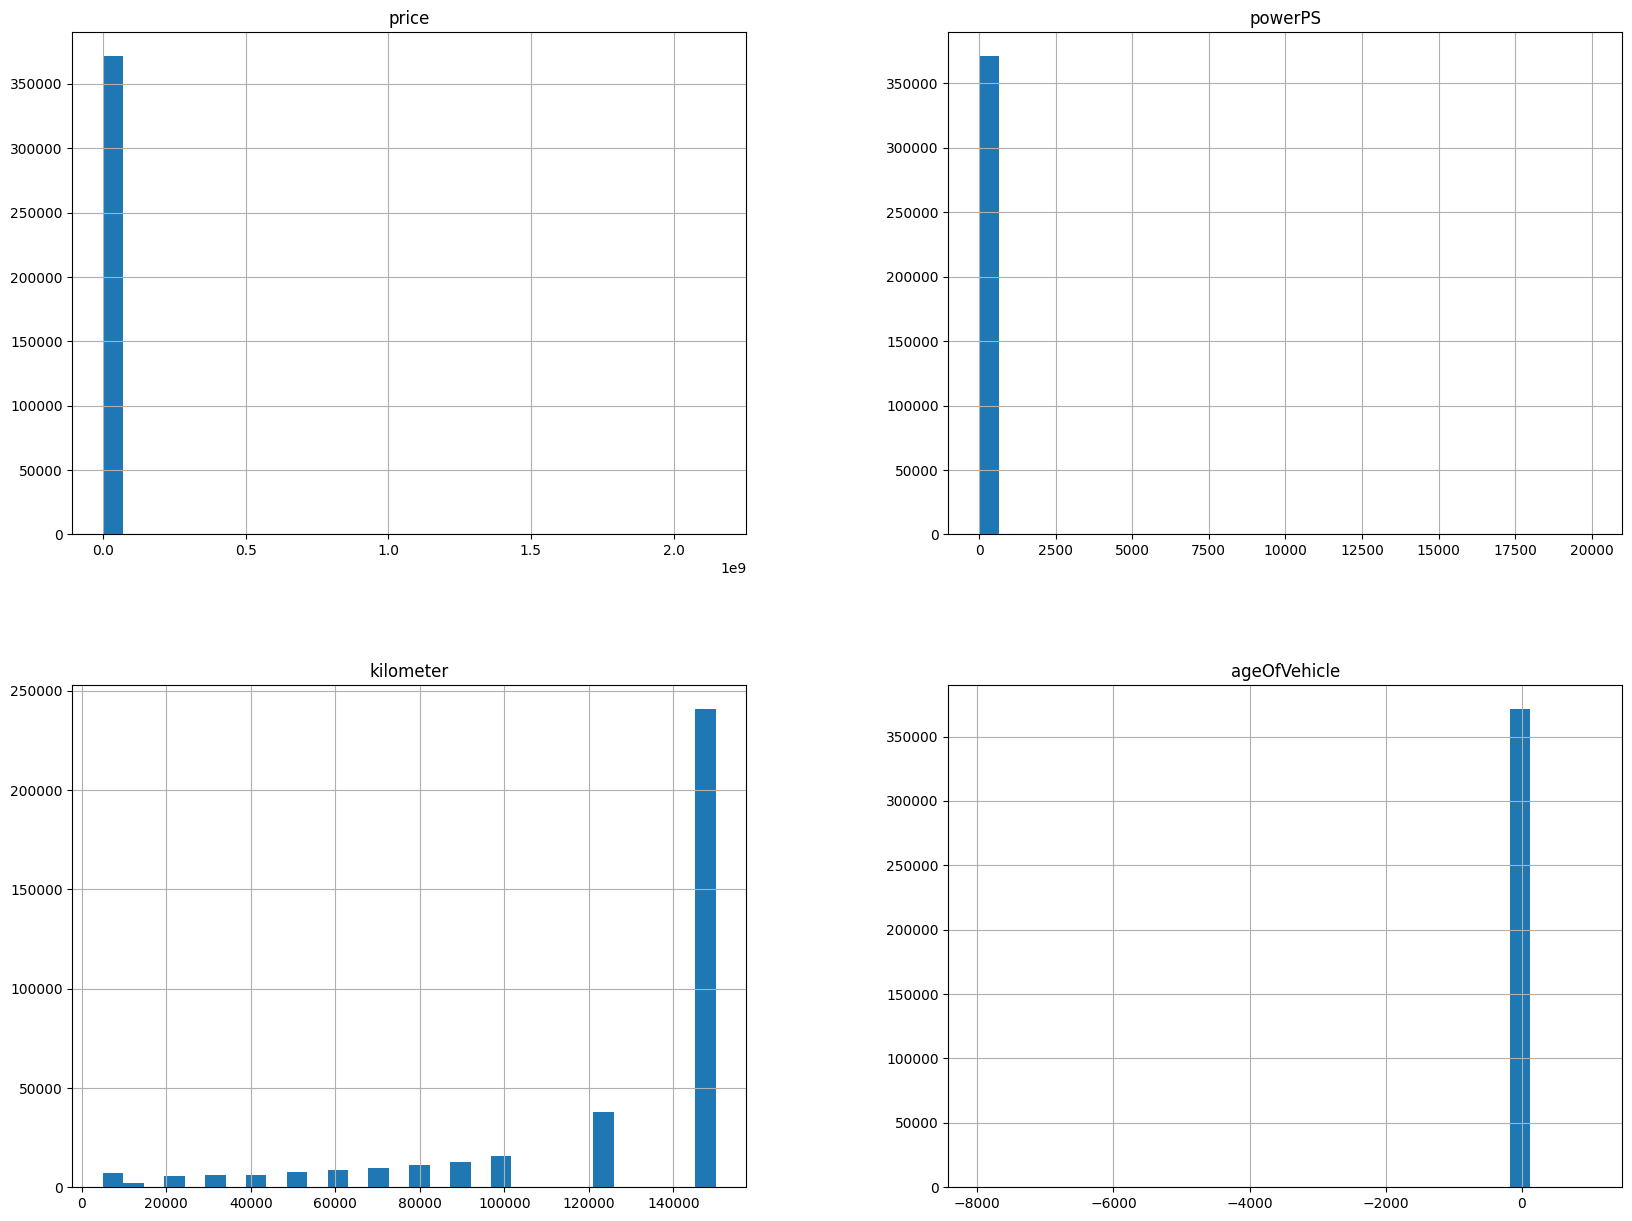

In [32]:
dados.hist(bins=30, figsize=(20,15))
plt.show()
# Cria histogramas para todas as variáveis numéricas do DataFrame.
# Permite visualizar a distribuição de cada variável e detectar outliers ou vieses.

**Gráfico de price (Preço dos veículos):**
O gráfico mostra que a maior parte dos preços está concentrada em valores muito baixos, próximos do zero.
Existe uma grande quantidade de registros com preços baixos, enquanto os valores mais altos (outliers) estão distantes e mal representados no gráfico.
Isso indica uma distribuição altamente assimétrica, com a presença de valores extremos (outliers) que podem distorcer a análise e impactar o desempenho do modelo.

Ação recomendada:

Investigar os valores muito baixos e muito altos para verificar se são consistentes com o contexto do problema.
Remover ou tratar outliers que não sejam representativos do mercado automotivo.

**Gráfico de powerPS (Potência do motor em cavalos):**
A maior parte dos valores de potência está concentrada em uma faixa muito baixa, enquanto há registros com valores extremamente altos (acima de 1.000 cv, chegando a 20.000 cv), o que é irreal.
Assim como no price, a distribuição é altamente assimétrica, com valores extremos que não representam a realidade de veículos comuns.

Ação recomendada:

Filtrar valores irrealisticamente altos (por exemplo, acima de 1.000 cv) e valores iguais a zero, que não fazem sentido para potência de motor.
Manter apenas valores dentro de um intervalo plausível para veículos

 **Gráfico de kilometer (Quilometragem rodada)**
A maior parte dos veículos está concentrada na faixa de quilometragem mais alta, próxima de 150.000 km. Isso sugere que o dataset é composto principalmente por veículos usados com rodagem elevada.
Há uma queda acentuada na frequência conforme a quilometragem diminui, indicando que veículos com baixa quilometragem são menos comuns.
Não há valores discrepantes visíveis, pois a quilometragem parece estar dentro de um intervalo plausível para veículos usados.
Ação recomendada:

Apesar de a distribuição ser esperada, é importante verificar se o limite superior de 150.000 km é uma restrição do dataset ou se há inconsistências nos dados.
Considerar normalizar essa variável para facilitar o treinamento do modelo.
**Gráfico de ageOfVehicle (Idade do veículo)**
O gráfico mostra valores completamente inconsistentes na variável ageOfVehicle, com idades negativas e extremamente altas.
Esses valores são claramente inválidos, indicando erros no cálculo ou no registro do ano de fabricação.
A maior parte dos veículos parece estar concentrada em idades próximas de 0 a 30 anos, mas os valores inválidos distorcem a visualização.
Ação recomendada:

Filtrar e remover valores negativos ou extremamente altos (por exemplo, acima de 100 anos).
Recalcular a idade do veículo, se necessário, para garantir a consistência.
Após o tratamento, replotar o gráfico para observar a distribuição correta da variável.

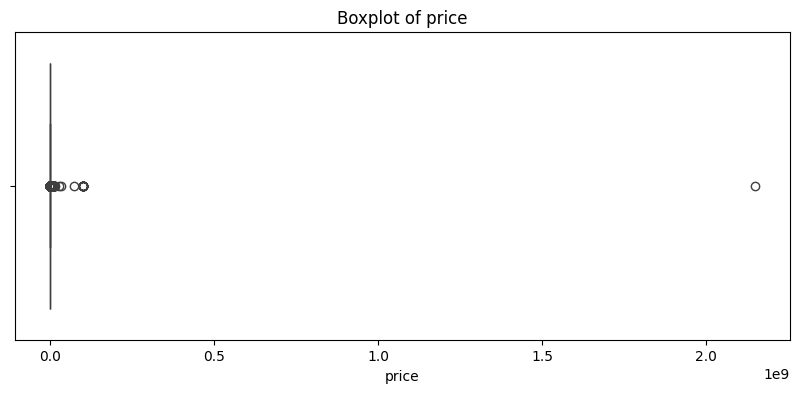

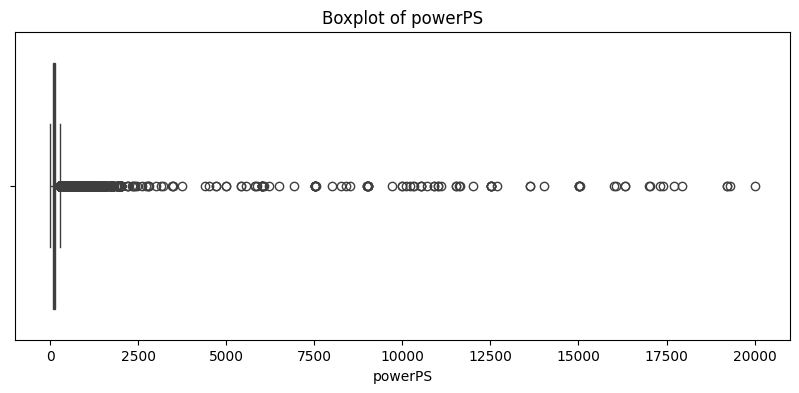

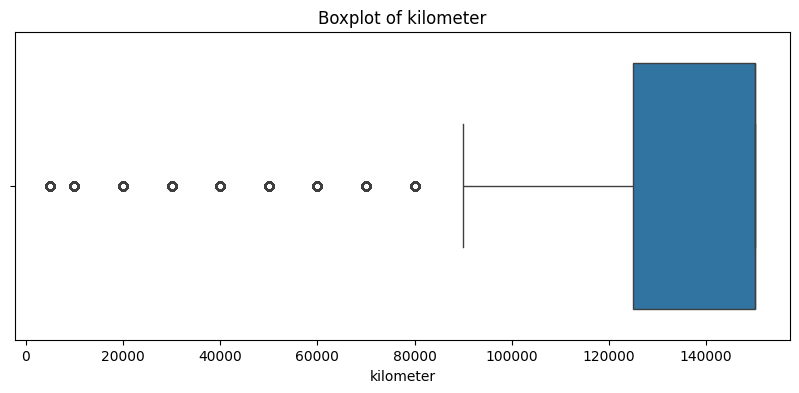

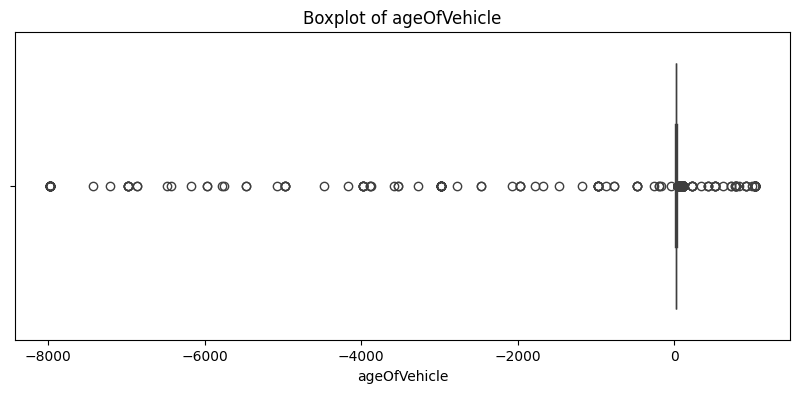

In [33]:
for col in ['price', 'powerPS', 'kilometer', "ageOfVehicle" ]:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=dados, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()
# Cria boxplots para variáveis-chave, para visualizar a presença de outliers.
# Outliers são dados extremos que podem influenciar o modelo; boxplots são perfeitos para detectá-los.

**Boxplot de price (Preço dos veículos):**
O boxplot revela uma grande quantidade de outliers na variável price, com valores extremamente altos que distorcem a escala do gráfico.
A maior parte dos preços está concentrada próxima do quartil inferior (valores baixos), enquanto os valores mais altos são raros e dispersos.
O valor máximo (cerca de 2 bilhões) é claramente um outlier irreal e precisa ser tratado antes da modelagem.
Ação recomendada:

Filtrar ou ajustar os valores extremos para evitar que esses outliers prejudiquem o desempenho do modelo.
Considerar uma transformação (como logaritmo) para reduzir o impacto da assimetria na distribuição.


 **Boxplot de powerPS (Potência do motor em cavalos):**
O boxplot mostra que há muitos valores atípicos na variável powerPS, com potências que chegam a 20.000 cv, o que é irreal para veículos automotivos.
A maior parte dos dados está concentrada no intervalo entre 0 e 200 cv, o que é esperado para veículos comuns.
Valores iguais a zero também aparecem, indicando possíveis dados ausentes ou inconsistências.
Ação recomendada:

Remover os valores de potência excessivamente altos (por exemplo, acima de 1.000 cv) e investigar os registros com potência igual a zero.
Focar na faixa de valores plausíveis para garantir que o modelo aprenda padrões reais.

 **Boxplot de kilometer (Quilometragem rodada):**
O boxplot mostra que a maior parte dos veículos possui quilometragem elevada, próxima de 150.000 km, o que é esperado para veículos usados.
Não há muitos outliers visíveis, indicando que a quilometragem está bem distribuída dentro de uma faixa plausível.
A variabilidade é baixa para quilometragens menores, sugerindo que veículos com quilometragem baixa são menos comuns no dataset.
Ação recomendada:

Não parece haver necessidade de tratamento para essa variável, já que os valores estão dentro de um intervalo esperado.
Pode-se normalizar ou padronizar a variável para facilitar o aprendizado do modelo.


 **Boxplot de ageOfVehicle (Idade do veículo):**
O boxplot revela problemas claros na variável ageOfVehicle, com muitos valores negativos e extremamente altos (inferiores a -8.000 anos ou superiores a 0).
Esses valores são inconsistentes e indicam erros no cálculo ou no registro do ano de fabricação do veículo.
A maior parte dos veículos parece estar concentrada em idades próximas de 0 a 30 anos, mas os valores inválidos distorcem a análise.
Ação recomendada:

Filtrar e remover valores negativos e extremamente altos (por exemplo, idades superiores a 100 anos ou inferiores a 0).
Após o tratamento, replotar o boxplot para verificar a distribuição real da variável.

# 4 - Limpeza dos Dados

### 4.1 Tratamento de Variáveis Numéricas

In [34]:
# Vamos substituir os valores de 'price' menores ou iguais a zero pela mediana calculada
# somente com os preços válidos (maiores que zero).
median_price = dados[dados['price'] > 0]['price'].median()
dados.loc[dados['price'] <= 0, 'price'] = median_price
print(f"Valores de 'price' <= 0 foram substituídos pela mediana: {median_price}")

Valores de 'price' <= 0 foram substituídos pela mediana: 3000.0


In [35]:
# 2. Winsorização dos Outliers:
# ----------------------------------
# Calculamos os limites do 1º e 99º percentis para a variável 'price'.
# Em seguida, percorremos cada valor de 'price' e:
#   - Se o valor for menor que o 1º percentil, ele é substituído pelo 1º percentil.
#   - Se o valor for maior que o 99º percentil, ele é substituído pelo 99º percentil.
q_low = dados['price'].quantile(0.01)
q_high = dados['price'].quantile(0.99)

# Função lambda para ajustar os valores:
dados['price'] = dados['price'].apply(lambda x: q_low if x < q_low else (q_high if x > q_high else x))
print(f"Outliers foram ajustados: valores abaixo de {q_low} foram substituídos por {q_low} e valores acima de {q_high} foram substituídos por {q_high}.")

Outliers foram ajustados: valores abaixo de 120.0 foram substituídos por 120.0 e valores acima de 36000.0 foram substituídos por 36000.0.


Para a variável "price", primeiro foram identificados os registros com preços menores ou iguais a zero. Esses valores, que não fazem sentido no contexto, são substituídos pela mediana dos preços válidos. A escolha pela mediana é feita porque, em distribuições assimétricas e com presença de outliers, a mediana tende a ser uma medida mais robusta e representativa do "valor típico" do preço.

Após essa imputação, para lidar com os outliers extremos (valores muito abaixo do esperado ou muito altos), utilizamos a técnica de winsorização. Essa técnica consiste em limitar os valores aos limites dos percentis 1% e 99%, ou seja, qualquer preço abaixo do 1º percentil passa a ter o valor do 1º percentil, e qualquer preço acima do 99º percentil passa a ter o valor do 99º percentil. Isso evita que valores extremos distorçam as análises subsequentes, preservando todos os registros, apenas ajustando seus valores para limites mais plausíveis.

Dessa forma, garantimos que a variável "price" esteja mais consistente e adequada para as fases seguintes do projeto, como a modelagem de machine learning.

In [36]:
# Seleciona os registros com valores plausíveis para a potência (entre 80 e 500)
mask_valid = (dados['powerPS'] >= 80) & (dados['powerPS'] <= 500)

# Calcula a mediana dos registros válidos para serem usados na imputação
median_ps = dados.loc[mask_valid, 'powerPS'].median()

# Calcula o 99º percentil dos registros válidos para definir o limite superior
q_high = dados.loc[mask_valid, 'powerPS'].quantile(0.99)

# Função para ajustar os valores de "powerPS":
def ajustar_powerPS(x):
    if x < 80:
        # Valores abaixo de 80 (ou zero) são substituídos pela mediana calculada
        return median_ps
    elif x > 500:
        # Valores acima de 500 são substituídos pelo 99º percentil (q_high)
        return q_high
    else:
        # Valores dentro do intervalo plausível (80 a 500) permanecem inalterados
        return x

# Aplica a função de ajuste na coluna "powerPS"
dados['powerPS'] = dados['powerPS'].apply(ajustar_powerPS)
print(f"Ajuste realizado para 'powerPS': Valores abaixo de 80 foram substituídos por {median_ps} e valores acima de 500 foram ajustados para {q_high}.")
print(f"Novo shape dos dados: {dados.shape}")

Ajuste realizado para 'powerPS': Valores abaixo de 80 foram substituídos por 135.0 e valores acima de 500 foram ajustados para 345.0.
Novo shape dos dados: (371528, 11)


Primeiramente, definimos que os valores de "powerPS" que são menores que 80 são considerados pouco plausíveis para um veículo (inclusive zeros).

Para determinar um valor representativo para substituir esses registros, calculamos a mediana dos valores que estão entre 80 e 500, pois esses valores são considerados válidos.
Em seguida, definimos que valores acima de 500 são excessivamente altos e provavelmente são outliers.

Usamos o 99º percentil (calculado também a partir dos dados considerados válidos) como o valor limite superior.
Assim, se um registro tiver "powerPS" acima de 500, ele é ajustado para esse valor do percentil.
Utilizamos uma função personalizada para aplicar esta lógica:

Se o valor for menor que 80, ele é substituído pela mediana calculada.
Se o valor for maior que 500, ele é substituído pelo valor do 99º percentil.
Se o valor estiver no intervalo de 80 a 500, ele é mantido.
Essa abordagem garante que não estaremos removendo registros, mas sim ajustando os valores extremos para que eles fiquem dentro de limites que façam sentido para a análise.

Dessa forma, a variável "powerPS" fica mais consistente e adequada para as próximas etapas do projeto, preservando todos os registros enquanto corrige possíveis erros ou valores atípicos extremos.



In [37]:
# Calcular o valor do 99º percentil para a variável "kilometer"
percentil_99 = dados['kilometer'].quantile(0.99)
print("O 99º percentil de 'kilometer' é:", percentil_99)

O 99º percentil de 'kilometer' é: 150000.0


In [38]:
# Calcular o valor do 1º percentil para a variável "kilometer"
percentil_1 = dados['kilometer'].quantile(0.01)
print("O 1º percentil de 'kilometer' é:", percentil_1)

O 1º percentil de 'kilometer' é: 5000.0


In [39]:
# Aplica winsorização: define os limites inferior e superior com base nos percentis 1 e 99
q_low = dados['kilometer'].quantile(0.01)
q_high = dados['kilometer'].quantile(0.99)

# Função lambda para realizar a winsorização na variável "kilometer"
dados['kilometer'] = dados['kilometer'].apply(lambda x: q_low if x < q_low else (q_high if x > q_high else x))
print("Aplicação de winsorização: valores abaixo de {0:.2f} foram ajustados para {0:.2f} e acima de {1:.2f} para {1:.2f}.".format(q_low, q_high))
print("Shape dos dados após winsorização:", dados.shape)


Aplicação de winsorização: valores abaixo de 5000.00 foram ajustados para 5000.00 e acima de 150000.00 para 150000.00.
Shape dos dados após winsorização: (371528, 11)


Calculamos os limites inferior (1º percentil) e superior (99º percentil) para identificar quais valores são considerados extremos.
Em seguida, utilizamos uma função lambda para ajustar os valores: os que estiverem abaixo do limite inferior são substituídos por esse mesmo limite e, similarmente, os que excederem o limite superior são ajustados para o valor do percentil 99.
Caso a distribuição se apresente fortemente assimétrica, optamos por aplicar uma transformação logarítmica, criando uma nova coluna "log_kilometer". Essa transformação pode facilitar futuras análises e modelagens, tornando a distribuição mais simétrica.

In [40]:
# Primeiro, definimos os registros "válidos" como aqueles com idade entre 0 e 100 anos
mask_valid_age = (dados['ageOfVehicle'] >= 0) & (dados['ageOfVehicle'] <= 100)

# Calcula a mediana dos registros considerados válidos (para imputação dos negativos)
median_age = dados.loc[mask_valid_age, 'ageOfVehicle'].median()

# Calcula também o 99º percentil para definir um limite superior, se necessário
q_high_age = dados.loc[mask_valid_age, 'ageOfVehicle'].quantile(0.99)

# Função para ajustar a idade:
#  - Se a idade for negativa, substituímos pela mediana.
#  - Se a idade for maior que 100, ou maior que o q_high_age (se esse for um critério mais adequado), substituímos por q_high_age.
#  - Caso contrário, mantemos o valor.
def ajustar_age(age):
    if age < 0:
        return median_age
    elif age > 100:
        return q_high_age
    else:
        return age

# Aplica o ajuste na variável "ageOfVehicle"
dados['ageOfVehicle'] = dados['ageOfVehicle'].apply(ajustar_age)

print("Ajuste realizado para 'ageOfVehicle': Valores negativos foram substituídos pela mediana ({0}), e valores acima de 100 foram limitados a {1}.".format(median_age, q_high_age))

Ajuste realizado para 'ageOfVehicle': Valores negativos foram substituídos pela mediana (22.0), e valores acima de 100 foram limitados a 46.0.


Primeiro, determinamos qual é a faixa de valores considerados plausíveis — neste caso, entre 0 e 100 anos.
Calculamos a mediana dos registros válidos para usá-la como referência na imputação dos valores negativos, que não fazem sentido.
Calculamos também o 99º percentil dos valores plausíveis para definir o limite superior. Caso algum veículo tenha uma idade extremamente alta (acima de 100 anos ou acima do valor do 99º percentil), ajustamos esse valor para o limite definido.
Usamos uma função personalizada para percorrer cada registro da coluna "ageOfVehicle" e aplicar as regras definidas: substituir idades inválidas e limitar os outliers.
Essa abordagem mantém todos os registros no conjunto de dados, mas ajusta os valores para que fiquem dentro de limites plausíveis, melhorando a qualidade dos dados sem removê-los.

In [41]:
dados.describe()

,price,powerPS,kilometer,ageOfVehicle
count,371528.000000,371528.000000,371528.000000,371528.000000
mean,5598.718229,142.528752,125618.688228,21.635632
std,6700.106961,46.588027,40112.337051,7.626533
min,120.000000,80.000000,5000.000000,6.000000
25%,1299.000000,116.000000,125000.000000,17.000000
50%,3000.000000,135.000000,150000.000000,22.000000
75%,7200.000000,150.000000,150000.000000,26.000000
max,36000.000000,500.000000,150000.000000,100.000000


**price (Preço do veículo):**

O preço mínimo agora é 120, enquanto o máximo foi ajustado para 36.000, eliminando valores extremos e inválidos. A média ficou em 5.598,71, indicando que a maioria dos veículos está dentro de uma faixa de preço acessível.

**powerPS (Potência do motor):**

A potência mínima foi ajustada para 80, e o máximo foi limitado a 500, garantindo que apenas valores plausíveis sejam considerados. A média ficou em 142,53, representando bem a potência típica de veículos comuns.

**kilometer (Quilometragem rodada):**

A quilometragem mínima foi ajustada para 5.000, enquanto o máximo foi limitado a 150.000, eliminando valores extremos. A média de 125.618,68 reflete a quilometragem típica de veículos usados.

**ageOfVehicle (Idade do veículo):**

A idade mínima agora é 6 anos, e o máximo foi ajustado para 100 anos, garantindo que valores fora da realidade fossem tratados. A média ficou em 21,63 anos, o que reflete bem a idade típica dos veículos no conjunto de dados.

Essas mudanças garantem que os dados estejam mais limpos, consistentes e adequados para análises, reduzindo a influência de valores extremos ou inválidos.

## 4.2 - Tratamento de variaveis Categoricas